In [3]:
import numpy as np
import time
import memory_profiler
import psutil
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Tạo dữ liệu mẫu
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
# Định nghĩa các mô hình
logistic_model = LogisticRegression()
random_forest_model = RandomForestClassifier(n_estimators=100)


In [17]:
# Đo thời gian huấn luyện và dự đoán cho Logistic Regression
start_time = time.time()
logistic_model.fit(X_train, y_train)
logistic_training_time = time.time() - start_time

start_time = time.time()
logistic_predictions = logistic_model.predict(X_test)
logistic_prediction_time = time.time() - start_time

print(f"Logistic Regression - Training time: {logistic_training_time:.4f} seconds")
print(f"Logistic Regression - Prediction time: {logistic_prediction_time:.4f} seconds")


Logistic Regression - Training time: 0.0120 seconds
Logistic Regression - Prediction time: 0.0000 seconds


In [8]:
# Đo thời gian huấn luyện và dự đoán cho Random Forest
start_time = time.time()
random_forest_model.fit(X_train, y_train)
rf_training_time = time.time() - start_time

start_time = time.time()
rf_predictions = random_forest_model.predict(X_test)
rf_prediction_time = time.time() - start_time

print(f"Random Forest - Training time: {rf_training_time:.4f} seconds")
print(f"Random Forest - Prediction time: {rf_prediction_time:.4f} seconds")


Random Forest - Training time: 0.3560 seconds
Random Forest - Prediction time: 0.0060 seconds


In [29]:
# Đo sử dụng bộ nhớ cho Logistic Regression
mem_before = memory_profiler.memory_usage()
logistic_model.fit(X_train, y_train)
mem_after = memory_profiler.memory_usage()
logistic_memory_usage = mem_after[0] - mem_before[0]

print(f"Logistic Regression - Memory usage: {logistic_memory_usage:.4f} MB")


Logistic Regression - Memory usage: 0.0000 MB


In [35]:
# Đo sử dụng bộ nhớ cho Random Forest
mem_before = memory_profiler.memory_usage()
random_forest_model.fit(X_train, y_train)
mem_after = memory_profiler.memory_usage()
rf_memory_usage = mem_after[0] - mem_before[0]

print(f"Random Forest - Memory usage: {rf_memory_usage:.4f} MB")


Random Forest - Memory usage: 0.0586 MB


In [36]:
# Đo độ ổn định với cross-validation cho Logistic Regression
logistic_cv_scores = cross_val_score(logistic_model, X, y, cv=5)
logistic_cv_mean = logistic_cv_scores.mean()
logistic_cv_std = logistic_cv_scores.std()

print(f"Logistic Regression - Cross-validation mean score: {logistic_cv_mean:.4f}")
print(f"Logistic Regression - Cross-validation score std deviation: {logistic_cv_std:.4f}")


Logistic Regression - Cross-validation mean score: 0.8140
Logistic Regression - Cross-validation score std deviation: 0.0198


In [37]:
# Đo độ ổn định với cross-validation cho Random Forest
rf_cv_scores = cross_val_score(random_forest_model, X, y, cv=5)
rf_cv_mean = rf_cv_scores.mean()
rf_cv_std = rf_cv_scores.std()

print(f"Random Forest - Cross-validation mean score: {rf_cv_mean:.4f}")
print(f"Random Forest - Cross-validation score std deviation: {rf_cv_std:.4f}")


Random Forest - Cross-validation mean score: 0.8980
Random Forest - Cross-validation score std deviation: 0.0121


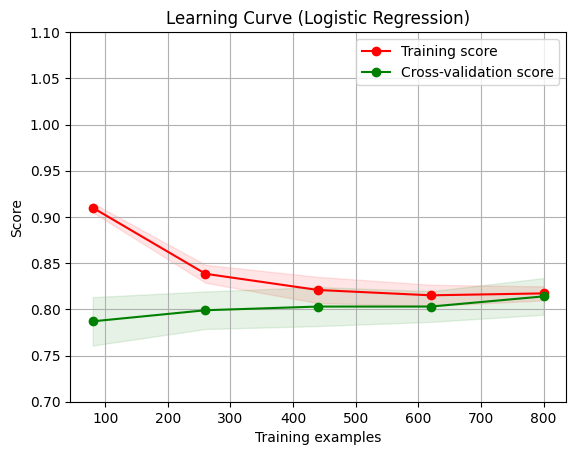

In [38]:
# Vẽ learning curve cho Logistic Regression
train_sizes, train_scores, test_scores = learning_curve(logistic_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve (Logistic Regression)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim(0.7, 1.1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


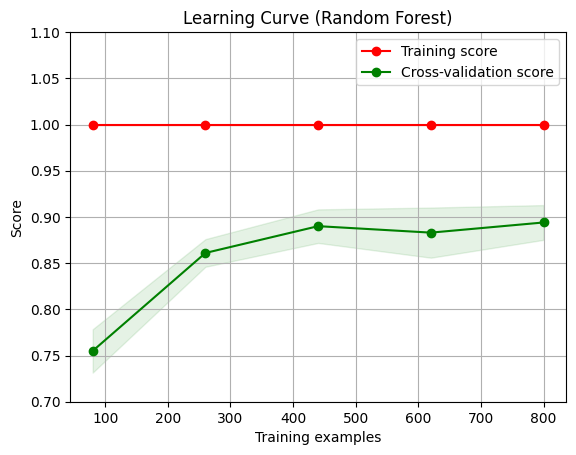

In [39]:
# Vẽ learning curve cho Random Forest
train_sizes, train_scores, test_scores = learning_curve(random_forest_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve (Random Forest)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim(0.7, 1.1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()
